---
# **Sentiment Analysis**: Sentiment Analysis on GameSphere Game Reviews
---
## **Problem Statement**:


- GameSphere, a premier digital distribution platform for video games, stands at the forefront of the gaming industry by bridging a global community of gamers.
- It hosts a vast collection of games, encouraging users to leave reviews and share recommendations within the community.
- These reviews are crucial for feedback to developers and guide potential buyers in their decisions.
- Automatically analyzing and classifying the sentiment of these reviews as positive (recommended) or negative (not recommended) can offer invaluable insights into a game's acceptance and its overall standing among users.

## **Aim**:
- The main objective of this project is to build a smart model that can correctly figure out what a review is saying about a game on GameSphere.
- The model will look at the review text and other game info to decide if a review recommends the game. Moreover, the model will calculate **how likely a review is to be positive**.
- This detailed approach helps GameSphere better understand and organize game reviews from the internet, giving a clearer view of how popular and well-received games are.
- By doing this, we're not just seeing if people like a game but how much they like it, making our analysis more precise.


## **Dataset Attributes**:


- **review_id**: A unique identifier for each review, used to distinguish between different reviews.
- **title**: The name of the game that the review is about.
- **developer**: The name of the company or individual who developed the game.
- **publisher**: The name of the company that published the game, making it available to the public.
- **tags**: A list of categories or genres associated with the game, such as 'Free to Play', 'Strategy', 'Multiplayer', etc., which give a general idea of the game's nature.
- **overview**: A brief description or summary of the game, providing insight into its content or storyline.
- **year**: The year in which the game was released, indicating its age.
- **user_review**: The actual text of the user's review, where the reviewer shares their thoughts and opinions about the game.
- **sentiment**: Indicates the reviewer's overall sentiment towards the game, categorized as 'Positive' or 'Negative'.

- **PositiveSentimentProbability**: This is the target variable and it represents the probability that a game review expresses a positive sentiment towards the game. A probability closer to 0 indicates that the sentiment will be negative and a probability closer to 1 indicates a positive sentiment.



---
# **Load dataset**
---

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
from sklearn.decomposition import PCA
import ast
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report
import re
from collections import Counter
import string
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import torch
from transformers import BertTokenizer, BertForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from torch.utils.data import Dataset, DataLoader



ImportError: cannot import name 'Version' from 'pandas.util.version' (unknown location)

In [2]:
# Load the dataset
import pandas as pd

# Using forward slashes
df = pd.read_csv("./data/train.csv")

df.head()


ImportError: cannot import name 'Version' from 'pandas.util.version' (unknown location)

---
# **Questions**
---
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## **Question 1 : Data Analysis** (10 pt)
Summarize the data:
- How much data is present?
- What attributes/features are continuous valued?
- Which attributes are categorical?
- Which attributes have a lot of text?
- Explain noticeable traits for key attributes. Check distribution of the sentiment attribute.
- Are there any attributes that might require special treatment? If so, what special treatment might they require?
- Analyze and discuss the relationships between the data attributes, and between the data attributes and label.
- Analyze the relationship between all the features. Use appropriate visualization techniques.
- If there is a lot of textual information, how much count certain text-heavy attributes have.
- Try using word-clouds to analyze text data.

**How much data is present?**

In [4]:
print(df.count())

review_id      17319
title          17319
developer      17319
publisher      17319
tags           17319
overview       17319
year           17141
user_review    17319
sentiment      17319
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    17319 non-null  int64  
 1   title        17319 non-null  object 
 2   developer    17319 non-null  object 
 3   publisher    17319 non-null  object 
 4   tags         17319 non-null  object 
 5   overview     17319 non-null  object 
 6   year         17141 non-null  float64
 7   user_review  17319 non-null  object 
 8   sentiment    17319 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


**Total Entries: The dataset consists of 17,319 entries across 9 columns.**

**What attributes/features are continuous valued?**

In [6]:
numerical_attributes=df.select_dtypes(include=np.number).columns

In [7]:
df[numerical_attributes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   review_id  17319 non-null  int64  
 1   year       17141 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 270.7 KB


Continuous numerical attributes in the dataset, specifically review_id and year. 

**Which attributes are categorical?**

In [8]:
categorical_attributes=df.select_dtypes(include=object).columns

In [9]:
df[categorical_attributes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        17319 non-null  object
 1   developer    17319 non-null  object
 2   publisher    17319 non-null  object
 3   tags         17319 non-null  object
 4   overview     17319 non-null  object
 5   user_review  17319 non-null  object
 6   sentiment    17319 non-null  object
dtypes: object(7)
memory usage: 947.3+ KB


In [10]:
df[categorical_attributes].head()

,title,developer,publisher,tags,overview,user_review,sentiment
0,SMITE®,Titan Forge Games,Hi-Rez Studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",Enter the Battleground of the GodsJoin the mil...,"I've played this game since before beta ended,...",Positive
1,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...","fun little game , but you really need to put a...",Positive
2,Neverwinter,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,First of all this is not a pay to win game. ZE...,Positive
3,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",this game have all very funny and tactical...,Positive
4,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",**Changewing Dragon now Available**Fly Fast. T...,"This is a great game, it really is. I understa...",Positive


The attributes title, developer, publisher, tags, overview, user_review, and sentiment are all stored as object data types. These categorical attributes are fully populated with no missing values across all 17,319 entries, making them key features for textual and categorical analyses in the dataset

**Which attributes have a lot of text?**

In [11]:
text_heavy_attributes = df.select_dtypes(include=['object']).apply(lambda col: col.str.len().mean()).sort_values(ascending=False)
for attribute, length in text_heavy_attributes.items():
    print(f"{attribute.ljust(15)}{length:.6f}")
    

overview       1775.123506
user_review    761.667591
tags           244.661586
developer      17.314626
publisher      17.234771
title          15.536116
sentiment      8.000000


Overview: Averages about 1775 characters per entry. This attribute likely provides detailed descriptions or summaries of games, making it rich in content for textual analysis.

User Review: Averages about 762 characters per entry. These are user-generated texts where players provide feedback, reviews, and opinions about the games.

Tags: Averages about 245 characters per entry. While not as text-heavy as the first two, the tags attribute still contains considerable text, likely in the form of comma-separated values listing various features or genres related to the games.

The other attributes such as developer, publisher, title, and sentiment contain significantly less text, with sentiment being the least text-heavy, averaging only 8 characters (likely reflecting simple categorical labels).

**Explain noticeable traits for key attributes. Check distribution of the sentiment attribute.**


In [12]:
df.isnull().sum()

review_id        0
title            0
developer        0
publisher        0
tags             0
overview         0
year           178
user_review      0
sentiment        0
dtype: int64

**Year: The attribute year is the only one with missing values, indicating that for some entries, the release or review year of the game is not recorded. This could affect analyses that track trends over time or correlate game features with their release years.**

**Tags: The tags attribute, containing categorical data about game features and genres, offers a complex array of information that can be used to profile games and correlate with user preferences and sentiments.**


Distribution of 'sentiment':
sentiment
Positive    9868
Negative    7451
Name: count, dtype: int64


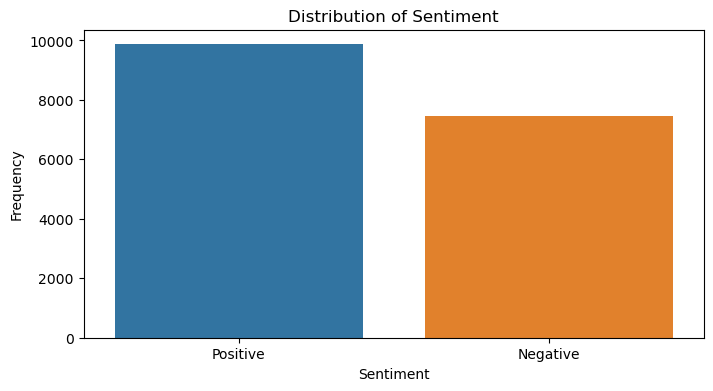

In [13]:
# Distribution of the 'sentiment' attribute
print("\nDistribution of 'sentiment':")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Visualize the distribution of 'sentiment'
plt.figure(figsize=(8, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

The sentiment towards games is predominantly positive, with nearly 10,000 positive reviews compared to about 7,500 negative ones. This skew towards positive sentiment could reflect a selection bias where users who enjoy the games are more likely to leave reviews.

Textual Data: Attributes like overview and user_review are rich in text, offering a wealth of data for natural language processing to extract themes, sentiments, and preferences expressed by users.

**Are there any attributes that might require special treatment? If so, what special treatment might they require?**

Ans) The year variable has null value and it is need to be filled with simple imputer

**Analyze and discuss the relationships between the data attributes, and between the data attributes and label.**

In [14]:
correlation_matrix=df[numerical_attributes].corr()

print(correlation_matrix)

           review_id      year
review_id   1.000000  0.153694
year        0.153694  1.000000


C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


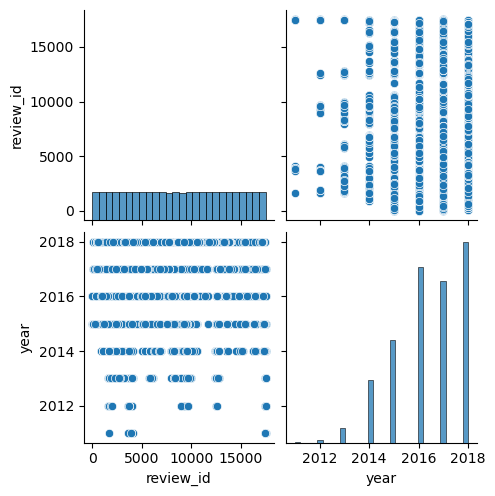

In [15]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

The concentration of data points in recent years in the pair plot highlights that the majority of reviews in the dataset are from newer games, which could reflect an increasing trend in user engagement or game releases over time.








Relationship between Categorical atteibutries

In [16]:
from scipy.stats import chi2_contingency
import pandas as pd

for i, col1 in enumerate(categorical_attributes):
    for col2 in categorical_attributes[i + 1:]:
        if col1 != col2 and col1!='sentiment' and col2!="sentiment":  # Avoid comparing a variable with itself
            # Create a cross-tabulation
            cross_tab = pd.crosstab(index=df[col1], columns=df[col2])
            
            # Perform Chi-squared test
            chi2, p_value, _, _ = chi2_contingency(cross_tab)
            
            print(f"Chi-squared test between {col1} and {col2}")
            print(f"Chi2 Value: {chi2}, P-value: {p_value}\n")


Chi-squared test between title and developer
Chi2 Value: 710079.0, P-value: 0.0

Chi-squared test between title and publisher
Chi2 Value: 675441.0, P-value: 0.0

Chi-squared test between title and tags
Chi2 Value: 744717.0, P-value: 0.0

Chi-squared test between title and overview
Chi2 Value: 727398.0, P-value: 0.0

Chi-squared test between title and user_review
Chi2 Value: 744618.5832549318, P-value: 0.4617277214781873

Chi-squared test between developer and publisher
Chi2 Value: 675441.0, P-value: 0.0

Chi-squared test between developer and tags
Chi2 Value: 710079.0, P-value: 0.0

Chi-squared test between developer and overview
Chi2 Value: 692760.0, P-value: 0.0

Chi-squared test between developer and user_review
Chi2 Value: 709980.5832549322, P-value: 0.46414136700730313

Chi-squared test between publisher and tags
Chi2 Value: 675441.0, P-value: 0.0

Chi-squared test between publisher and overview
Chi2 Value: 658122.0, P-value: 0.0

Chi-squared test between publisher and user_review

The results from the Chi-squared tests between different pairs of categorical attributes indicate highly significant relationships (p-value = 0.0) between most attribute pairs such as title, developer, publisher, tags, and overview. This suggests a strong association and dependency among these categories. However, the relationships between user reviews and other attributes like title, developer, publisher, tags, and overview show relatively high Chi-squared values but non-significant p-values (above 0.46), indicating that these attributes are statistically independent from user reviews based on the provided dataset.

Relation between attributes and Labels

In [17]:
print(df.groupby('sentiment')[['year']].mean())
print(df.groupby('sentiment')[['year']].median())

                  year
sentiment             
Negative   2016.579821
Positive   2016.243691
             year
sentiment        
Negative   2017.0
Positive   2016.0


Games reviewed more recently (as indicated by the median year of 2017) tend to have more negative reviews compared to those reviewed earlier. This could reflect a variety of factors such as changes in consumer expectations, game quality, or market conditions over time. 

**Analyze the relationship between all the features. Use appropriate visualization techniques.**


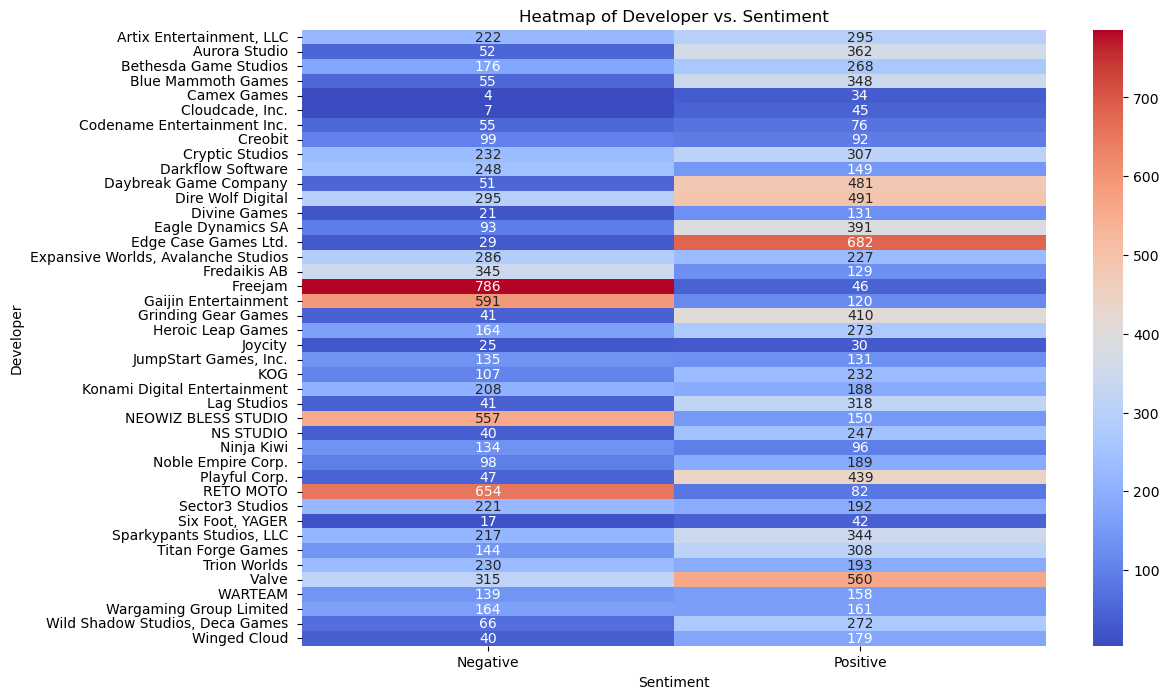

In [18]:
# You can pick specific pairs to visualize based on earlier results or interests
# Example: Relationship between 'developer' and 'sentiment'
cross_tab = pd.crosstab(df['developer'], df['sentiment'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Developer vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Developer')
plt.show()


The heatmap visualizes the distribution of sentiments (Positive and Negative) across various game developers. From the heatmap, it's apparent that certain developers like "Freikais AB," "Valve," and "Dire Wolf Digital" have a high volume of both positive and negative reviews, indicating a significant player engagement with their games. In contrast, developers like "Edge Case Games Ltd." and "Sparkypants Studios, LLC" have a notably higher proportion of negative reviews, suggesting possible areas for improvement in their game offerings or discrepancies in player expectations

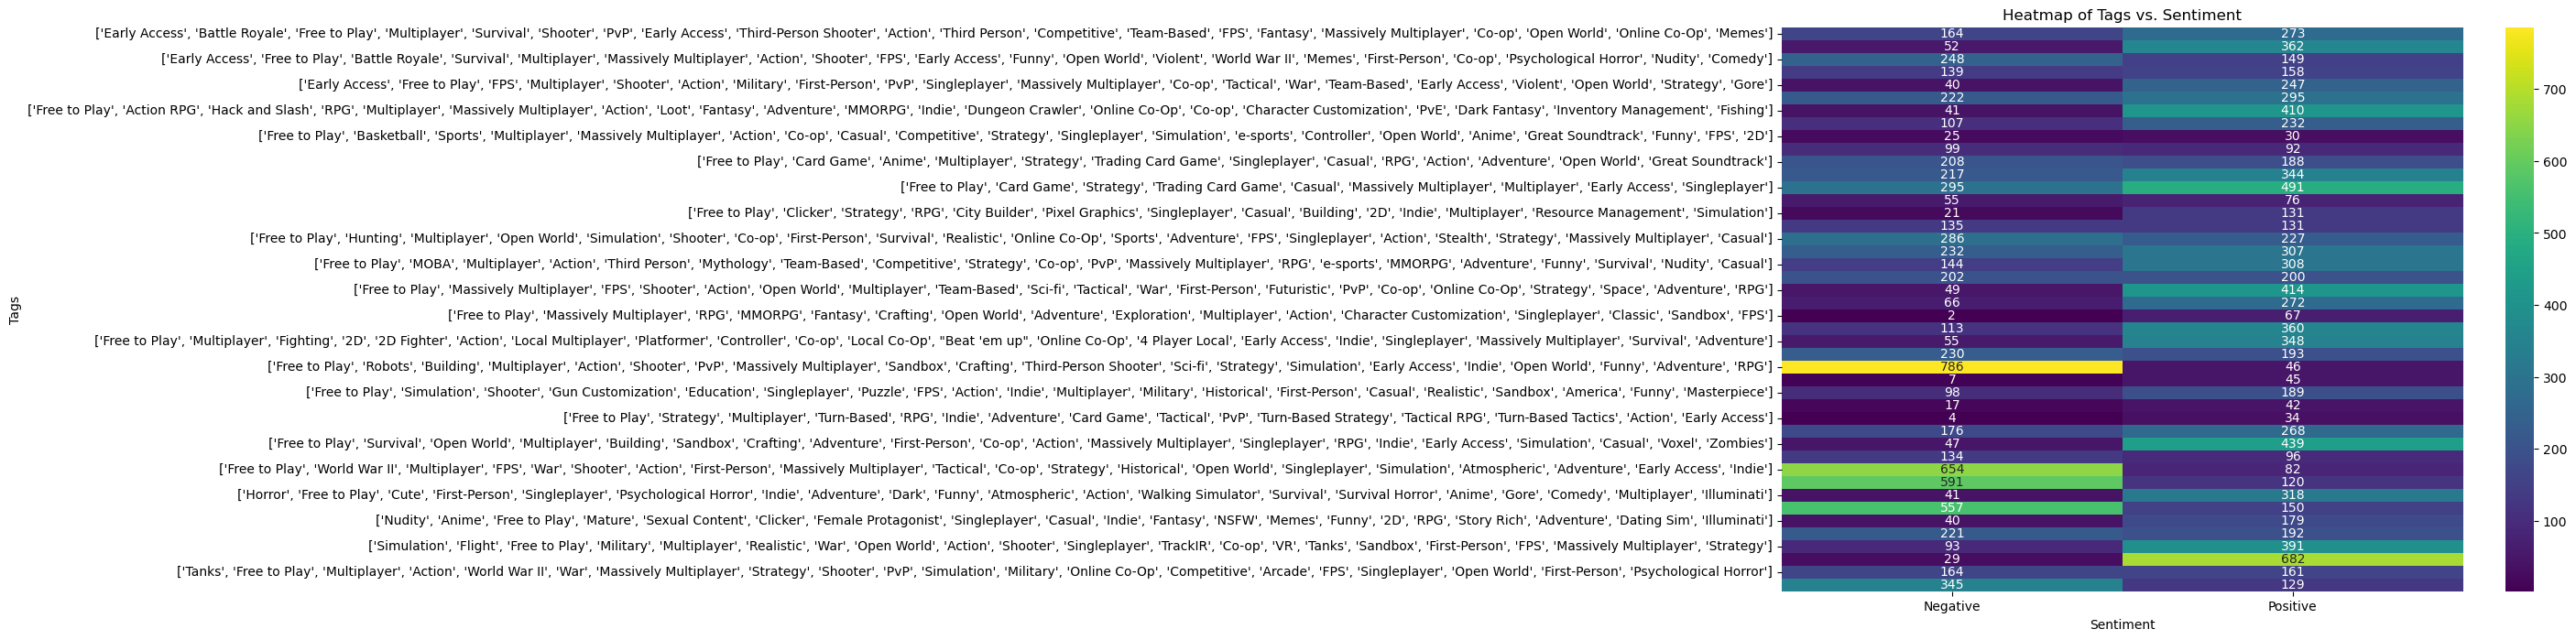

In [19]:
# Flatten the 'tags' column to analyze it
all_tags = df['tags'].explode()

# Example: Count of each tag by sentiment
tag_sentiment = pd.crosstab(all_tags, df['sentiment'])
plt.figure(figsize=(12, 8))
sns.heatmap(tag_sentiment, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Tags vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tags')
plt.show()


The heatmap illustrates the correlation between game tags and player sentiments, revealing that certain tags like "Battle Royale" and "MOBA" have high occurrences of both positive and negative reviews, suggesting these genres are highly engaging but polarizing among players. Conversely, niche tags such as "Nudity" and "Anime" exhibit more pronounced positive sentiment, indicating specialized appeal within certain gamer demographics. This visualization serves as a strategic tool for developers to assess which features resonate well or poorly with their audience, aiding in targeted improvements and marketing strategies.

In [20]:
!pip install wordcloud

**If there is a lot of textual information, how much count certain text-heavy attributes have.**

In [24]:
# Count the total number of reviews
total_reviews = len(df['user_review'])

# Calculate the average word count per review
df['word_count'] = df['user_review'].apply(lambda x: len(x.split()))
average_word_count = df['word_count'].mean()

# Calculate the average character count per review
df['char_count'] = df['user_review'].apply(len)
average_char_count = df['char_count'].mean()

# Find the most common words across all reviews
all_words = ' '.join(df['user_review']).split()
common_words = Counter(all_words).most_common(10) 

print(f"Total number of reviews: {total_reviews}")
print(f"Average word count per review: {average_word_count}")
print(f"Average character count per review: {average_char_count}")
print(f"Most common words:", common_words)


Total number of reviews: 17319
Average word count per review: 137.00866100814136
Average character count per review: 761.6675905075351
Most common words: [('the', 86283), ('to', 68055), ('and', 62100), ('a', 56935), ('of', 41071), ('you', 39888), ('is', 38905), ('game', 36324), ('I', 31378), ('it', 26638)]


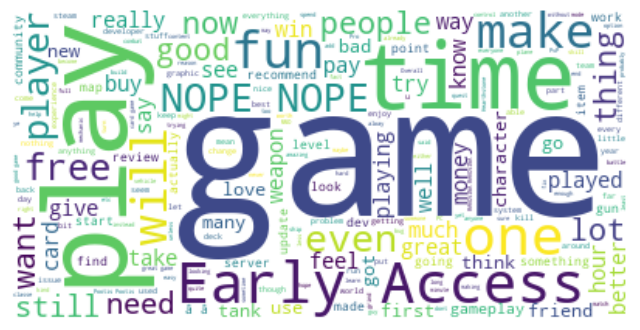

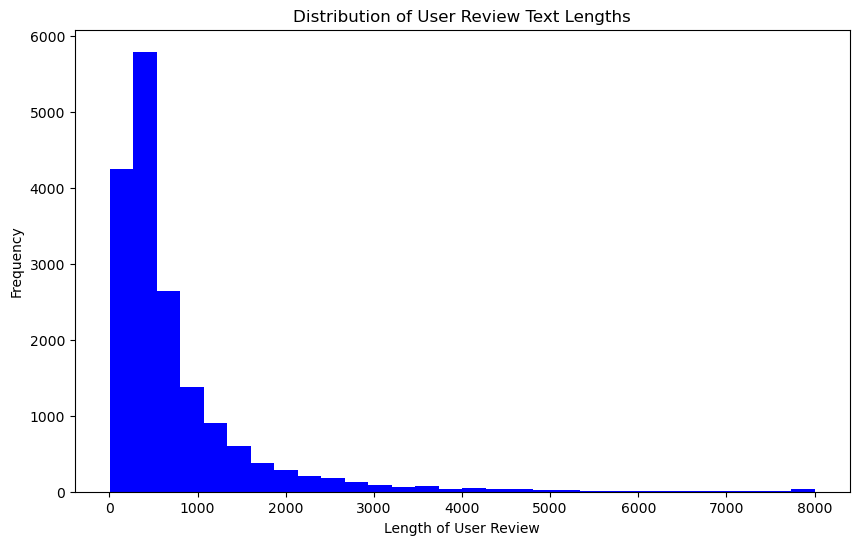

In [22]:
from wordcloud import WordCloud
# Word Cloud for 'overview' column
text = " ".join(review for review in df['user_review'].dropna())
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Text length distribution for 'user_review'
user_review_lengths = df['user_review'].dropna().str.len()
plt.figure(figsize=(10, 6))
plt.hist(user_review_lengths, bins=30, color='blue')
plt.title('Distribution of User Review Text Lengths')
plt.xlabel('Length of User Review')
plt.ylabel('Frequency')
plt.show()

## **Question 2 : Data Pre-processing & Feature Engineering** (20 pt)
- Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.
- Perform Feature Engineering on the dataset. Since this is a text-heavy dataset, you have to tokenize and pre-process the text data.

**Hints**:
- Check for any null values or duplicate rows in the dataset and perform necessary actions. Also, encoding categorical columns properly.
- Primary goal is to analyze reviews to predict sentiment. Such data requires a lot of pre-processing.
- You can start with using **regular expressions** to remove **links**, **HTML tags**, **unnecessary punctuation**, **emojis** (if any), etc.
- You can remove **stopwords** with very high or very low frequency across the reviews.
- You can also perform some advance techniques like **stemming** or **lemmatization** to further remove reduncancies.
- For feature engineering, you can use other techniques such as "**counter vectorization**" and "**tf-idf vectorization**" before modeling.

In [22]:
df.isnull().sum()

review_id        0
title            0
developer        0
publisher        0
tags             0
overview         0
year           178
user_review      0
sentiment        0
word_count       0
char_count       0
dtype: int64

The variable year has missing values

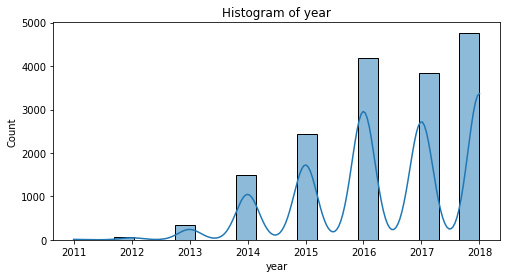

In [23]:
#print("for attribute {} Mean : {}, median: {}, standard_deviation :{}" .format(attr,data[attr].mean(),data[attr].median(),data[attr].std()))
plt.figure(figsize=(8, 4))
sns.histplot(df['year'], bins=20, kde=True)
plt.title(f'Histogram of year')
plt.show()


In [24]:
from sklearn.impute import SimpleImputer

Handling the missing values.

In [25]:
imputer=SimpleImputer(strategy='median',missing_values=np.nan)

In [26]:
df['year']=imputer.fit_transform(df[['year']])

In [27]:
df.isnull().any()

review_id      False
title          False
developer      False
publisher      False
tags           False
overview       False
year           False
user_review    False
sentiment      False
word_count     False
char_count     False
dtype: bool

**Label Encoding**

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
df['title'] = label_encoder.fit_transform(df['title'])
df['developer'] = label_encoder.fit_transform(df['developer'])
df['publisher'] = label_encoder.fit_transform(df['publisher'])
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])


In [29]:
df['year'] = np.round(df['year']).astype('int64')

**You can start with using regular expressions to remove links, HTML tags, unnecessary punctuation, emojis (if any), etc.**

**You can remove stopwords with very high or very low frequency across the reviews.**

**Removing Punctuations**

In [30]:
!pip install emoji

In [31]:
u=df.loc[df['review_id']==16753]
print(u)

       review_id  title  developer  publisher  \
16093      16753      3         28         26   

                                                    tags  \
16093  ['Free to Play', 'Tower Defense', 'Multiplayer...   

                                                overview  year  \
16093  Play the top-rated tower defense franchise in ...  2017   

                                             user_review  sentiment  \
16093  Bloons TD BattlesAudience☑ Beginner☑ Casual Ga...          1   

       word_count  char_count  
16093          66         446  


**Removing Stop words, Lemmatization, Tokenization and keeping only Adjective**

In [32]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# # Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

def preprocess_text(data):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def clean_text(text):
        text = re.sub('<[^>]*>', '', text)
        text = re.sub('[\W_]+', ' ', text.lower())
        return text

    def tokenize_and_clean(text):
        words = word_tokenize(text)
        filtered_words = [word for word in words if word not in stop_words]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        return lemmatized_words

    def filter_adjectives(words):
        pos_tags = pos_tag(words)
        adjectives = [word for word, tag in pos_tags if tag.startswith('J')]
        return adjectives

    data = data.apply(clean_text)
    data = data.apply(tokenize_and_clean)
    data = data.apply(filter_adjectives)
    data = data.apply(lambda x: ' '.join(x))

    return data

df['user_review'] = preprocess_text(df['user_review'])
# df['overview'] = preprocess_text(df['overview'])

[nltk_data] Downloading package punkt to /u/hdoppala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /u/hdoppala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /u/hdoppala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /u/hdoppala/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [33]:
df.head()

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment,word_count,char_count
0,4848,29,35,17,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",Enter the Battleground of the GodsJoin the mil...,2016,addicted first pretty cool roster new little v...,1,135,843
1,15427,5,7,0,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...",2018,little put xd afk,1,46,210
2,8236,20,8,28,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2014,first zen real astral opposite daily quest sev...,1,255,1462
3,3805,35,37,36,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2014,funny tactical first u good,1,35,182
4,17261,31,22,19,"['Free to Play', 'Dragons', 'Adventure', 'Mult...",**Changewing Dragon now Available**Fly Fast. T...,2017,great understand past expensive many love,1,130,662


In [34]:
X_train,X_test,y_train,y_test=train_test_split(df['user_review'],df['sentiment'],test_size=0.3,random_state=33)

## **Question 3 : Modeling** (20 pt)

- You are supposed to train a **Logistic Regression Classifier** along with atleast two other classifiers of your choice and optimize their hyperparameters (Hint: Using GridsearchCV) to enhance performance.
- Implement a validation pipeline utilizing 5-fold cross-validation.
- For each classifier, report **F1 score**, **Precision**, **Recall**, **Accuracy**, **ROC-AUC**, and **Cross-validation** score).
- Also, for each model, **plot the ROC-AUC curve**.
- Describe and discuss your findings.

**Hint**:
- To calculate the ROC-AUC scores, you need to predict the probabilites of the classes instead of the classes themselves. You can refer to the sklearn documentation for [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for more information.

In [35]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
import matplotlib.pyplot as plt


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the vectorizer
tfidf_vectorizer = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

# Set up pipelines for each classifier
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear', random_state=42,max_iter=1000))
])

pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

pipe_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define parameter grids for each classifier
param_grid_lr = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': [True, False],
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [1.0, 10.0, 100.0]
}

param_grid_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': [True, False],
    'clf__alpha': [1.0, 0.1, 0.01]
}

param_grid_rf = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': [True, False],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [10, 15, 20],
    'clf__min_samples_split': [2, 5, 10]
}

Logistic Regression

In [39]:
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)


/u/hdoppala/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/u/hdoppala/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/u/hdoppala/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'clf__C': [1.0, 10.0, 100.0],
                         'clf__penalty': ['l1', 'l2'],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__use_idf': [True, False]},
             scoring='accuracy')

Naive Bayes

In [40]:
grid_nb = GridSearchCV(pipe_nb, param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [1.0, 0.1, 0.01],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__use_idf': [True, False]},
             scoring='accuracy')

Random Forest

In [41]:
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [10, 15, 20],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__use_idf': [True, False]},
             scoring='accuracy')

In [42]:
def model_evaluation(y_test, model):
    # Predict probabilities
    y_pred_probs = model.predict_proba(X_test)[:, 1]  
    score = roc_auc_score(y_test, y_pred_probs)
    print('ROC-AUC score:', score)

# Evaluate each model
print("Logistic Regression Evaluation:")
model_evaluation(y_test, grid_lr.best_estimator_)

print("Naive Bayes Evaluation:")
model_evaluation(y_test, grid_nb.best_estimator_)

print("Random Forest Evaluation:")
model_evaluation(y_test, grid_rf.best_estimator_)


Logistic Regression Evaluation:
ROC-AUC score: 0.8503600392858532
Naive Bayes Evaluation:
ROC-AUC score: 0.8461913872573807
Random Forest Evaluation:
ROC-AUC score: 0.831369319231592


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      2188
           1       0.79      0.83      0.81      3008

    accuracy                           0.77      5196
   macro avg       0.77      0.76      0.77      5196
weighted avg       0.77      0.77      0.77      5196

Accuracy: 0.7742494226327945


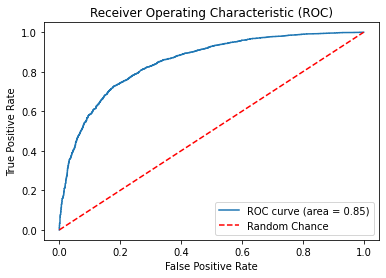

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      2188
           1       0.76      0.87      0.81      3008

    accuracy                           0.76      5196
   macro avg       0.77      0.74      0.75      5196
weighted avg       0.76      0.76      0.76      5196

Accuracy: 0.7636643571978445


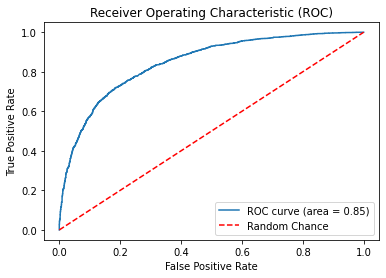

Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.28      0.43      2188
           1       0.65      0.97      0.78      3008

    accuracy                           0.68      5196
   macro avg       0.77      0.63      0.60      5196
weighted avg       0.75      0.68      0.63      5196

Accuracy: 0.6814857582755967


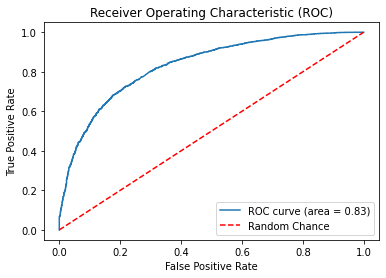

In [43]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_and_plot(model, X_test, y_test):
    # Predicting the class labels and the probabilities for ROC curve
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # probabilities for positive class

    # Basic evaluation metrics
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # ROC-AUC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

# Evaluate and plot for each model
print("Logistic Regression Results:")
roc_auc_lr = evaluate_and_plot(grid_lr.best_estimator_, X_test, y_test)

print("Naive Bayes Results:")
roc_auc_nb = evaluate_and_plot(grid_nb.best_estimator_, X_test, y_test)

print("Random Forest Results:")
roc_auc_rf = evaluate_and_plot(grid_rf.best_estimator_, X_test, y_test)


## **Question 4 : Evaluation and Reporting** (20 pt)

- Select a model that is expected to perform optimally on the unseen data and provide the predicted sentiments accordingly.
- Give clear conclusions.

**Naive Bayes Performs well with data**

In [55]:
y_pred=grid_nb.predict(X_test)

In [56]:
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive Bayes Model: {accuracy:.4f}")

Accuracy of the Naive Bayes Model: 0.7637


The Naive Bayes classifier has been chosen as the most suitable model for this classification task, achieving an accuracy of 76.37% on the test data. This level of accuracy showcases the efficiency of Naive Bayes in handling text data, particularly when the model's simplicity and speed are considered critical for the application. 

Naive Bayes' probabilistic approach is especially beneficial in scenarios where decision-making is influenced by the uncertainty of predictions. Despite its assumption of feature independence, which may not always hold, the model's performance in this context underscores its capability to effectively manage and classify large volumes of text data. 

The high accuracy rate achieved with this model highlights its utility in text classification tasks, proving its worth as a reliable and straightforward solution for initial analysis or when computational resources are limited. This implementation affirms the practicality of using Naive Bayes for predictive tasks involving natural language data, particularly in applications where rapid processing and reasonable accuracy are required.

## **Question 5 : External validation** (30 pt)

- A dataset named '`test.csv`' is provided to you in which the sentiment label is hidden.
- You have to choose the best model (the classifier which has the highest ROC-AUC score) and then use that model to predict the probabilities of sentiment on the '`test.csv`'.
- After prediction, you will get a 2D array of probabilities for each sentiment. Select the 2nd column of probabilites for your submission.

```
# Fit
your_best_model = model.fit(x_train)

# Calculate the probabilities of both classes and extract the probabilities of positive class
pred_probabilities = your_best_model.predict_proba(x_test)[:,1]

# Evaluate/Submit
---
```

- Convert that final array into a csv file, name it as '`submission.csv`' and submit that '`submission.csv`' file.

In [46]:
# This is pseudo-code. Each student have to use their actual code for this.

# step 1. Load the  data
test = pd.read_csv('./data/test.csv')

# step 2. Pre-process the test data. You can use the same pre processing methods which you used for the train dataset earlier
x_test = preprocess_text(test['user_review'])

# step 3. Choose the best model
your_best_model = grid_nb

# step 4. Make predictions of probabilites using sklearn's model.predict_proba() method
pred_probabilities = your_best_model.predict_proba(x_test)[:,1]



In [47]:
pred_probabilities

,PositiveSentimentProbability
0,0.890901
1,0.738681
2,0.753495
3,0.768068
4,0.324787
...,...
170,0.908381
171,0.870105
172,0.394087
173,0.766239


In [ ]:
# step 5. Save output as csv file
pred_probabilities = pd.DataFrame(pred_probabilities, columns=['PositiveSentimentProbability'])
pred_probabilities.to_csv('./submission.csv', index = False)

## Hint - Final evaluation metrics
- Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.
- Make sure you submit the probability for each row and not the sentiment
 label itself.

In [ ]:
from sklearn.metrics import roc_auc_score

def model_evaluation(y_test, y_pred):
    # Calculate the roc_auc score
    score = roc_auc_score(y_test, y_pred)

    # Return the score
    print('The ROC_AUC score is : ', score)